# Time Series Analysis of the San Antonio Metro Area

Author: Melody Bass

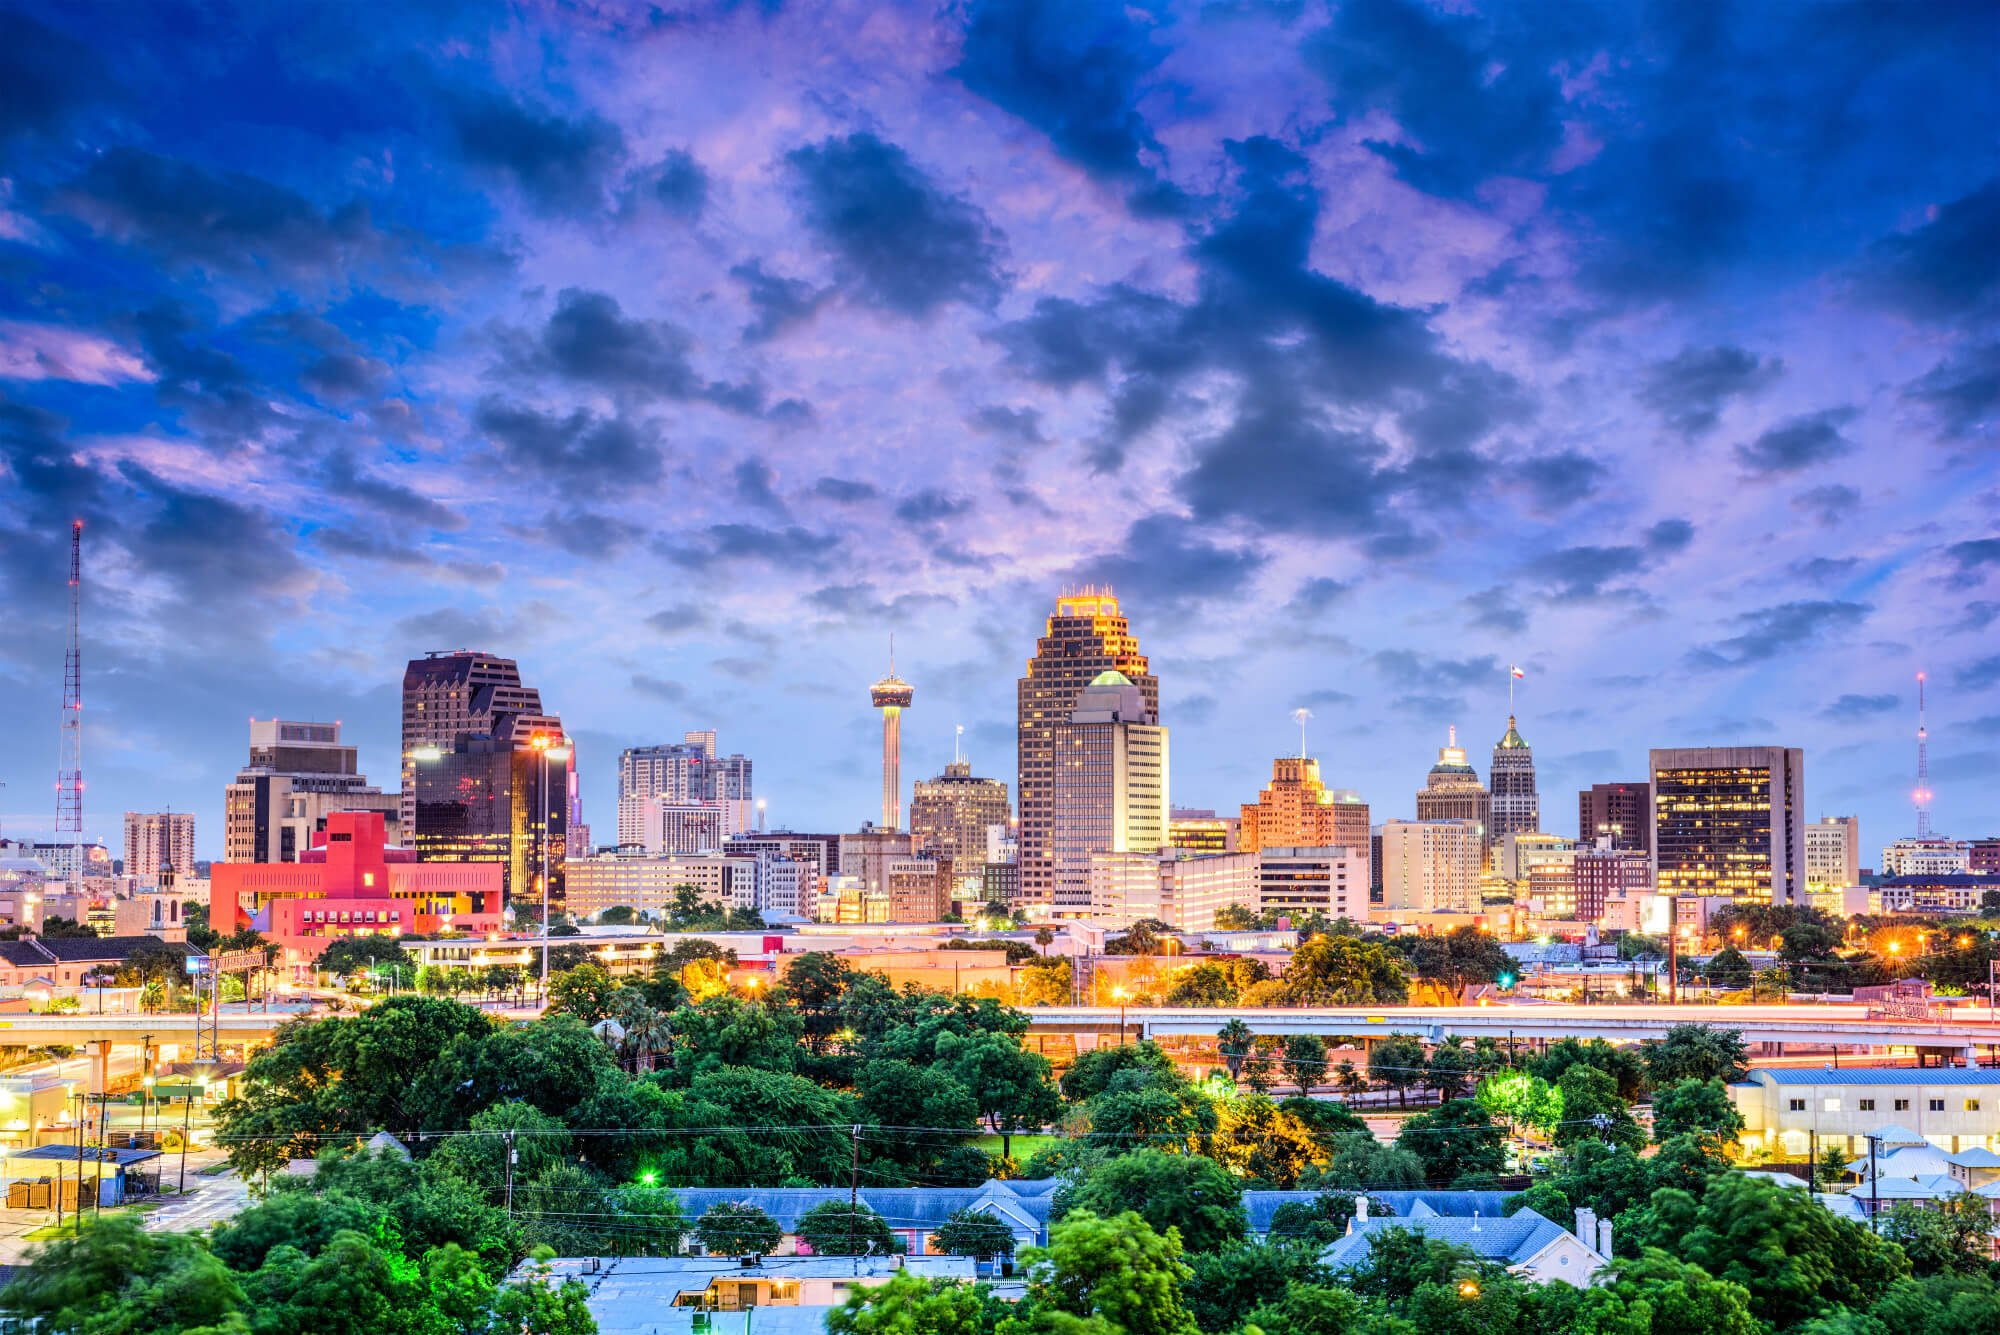

## Overview

## Business Problem

## Data Understanding

In [1]:
# Basics
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [2]:
# load in zillow home price data as df
df = pd.read_csv('data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
df['Metro'].value_counts()

New York                          779
Los Angeles-Long Beach-Anaheim    347
Chicago                           325
Philadelphia                      281
Washington                        249
                                 ... 
The Dalles                          1
North Platte                        1
Corinth                             1
Dickinson                           1
Poplar Bluff                        1
Name: Metro, Length: 701, dtype: int64

In [4]:
#Dataframe containing only zips from San Antonio metro

sa_df = df[df['Metro']=='San Antonio']
sa_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,92359,78263,China Grove,TX,San Antonio,Bexar,11468,118800.0,118800.0,118800.0,...,231900,232900,234300,234400,233200,232700,233600,235700,239400,242400
12561,92268,78123,McQueeney,TX,San Antonio,Guadalupe,12562,189600.0,189600.0,189400.0,...,313400,317200,321000,321400,318800,319100,322900,326900,331700,335700
13442,92283,78147,Poth,TX,San Antonio,Wilson,13443,63800.0,63800.0,63900.0,...,135800,136700,138000,139300,140700,141400,140900,139900,139400,139500
13893,92231,78056,Mico,TX,San Antonio,Medina,13894,178500.0,178500.0,178400.0,...,373500,374500,379200,376800,362200,345400,336400,331100,328300,326600


In [5]:
sa_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000
mean,92313.269231,78202.974359,4915.756410,118574.358974,118574.358974,118598.717949,118637.179487,118705.128205,118792.307692,118919.230769,...,209450.000000,210360.256410,211416.666667,212305.128205,212937.179487,213852.564103,214932.051282,216239.74359,217925.641026,219064.102564
std,69.915473,116.316739,3837.418925,67589.352954,67681.105645,67779.498286,67900.471679,68040.171285,68190.565233,68377.591943,...,106328.023148,106260.242091,106536.563343,106827.188885,106929.405173,107045.249231,107329.535633,107601.17358,107794.259823,107723.665205
min,92193.000000,78003.000000,32.000000,36100.000000,36100.000000,36200.000000,36200.000000,36300.000000,36400.000000,36500.000000,...,74800.000000,75700.000000,75900.000000,74600.000000,72500.000000,71300.000000,70700.000000,71200.00000,72600.000000,73700.000000
25%,92283.250000,78147.250000,1334.000000,62450.000000,62450.000000,62550.000000,62625.000000,62625.000000,62625.000000,62700.000000,...,128800.000000,131700.000000,132900.000000,132900.000000,132375.000000,132475.000000,133625.000000,135525.00000,137375.000000,138600.000000
50%,92316.500000,78220.500000,4422.500000,101400.000000,101350.000000,101300.000000,101200.000000,101100.000000,101050.000000,101000.000000,...,184050.000000,184700.000000,185350.000000,186100.000000,186550.000000,187050.000000,187850.000000,189000.00000,191550.000000,193050.000000
75%,92342.500000,78246.500000,7801.000000,154200.000000,154125.000000,154150.000000,154300.000000,154375.000000,154100.000000,153925.000000,...,265825.000000,266125.000000,266550.000000,267475.000000,268625.000000,270375.000000,272400.000000,274075.00000,277075.000000,282100.000000
max,92715.000000,78861.000000,14175.000000,404800.000000,406300.000000,407800.000000,409300.000000,410800.000000,412200.000000,413600.000000,...,599800.000000,600600.000000,602600.000000,606100.000000,608800.000000,611000.000000,613400.000000,614600.00000,614500.000000,612600.000000


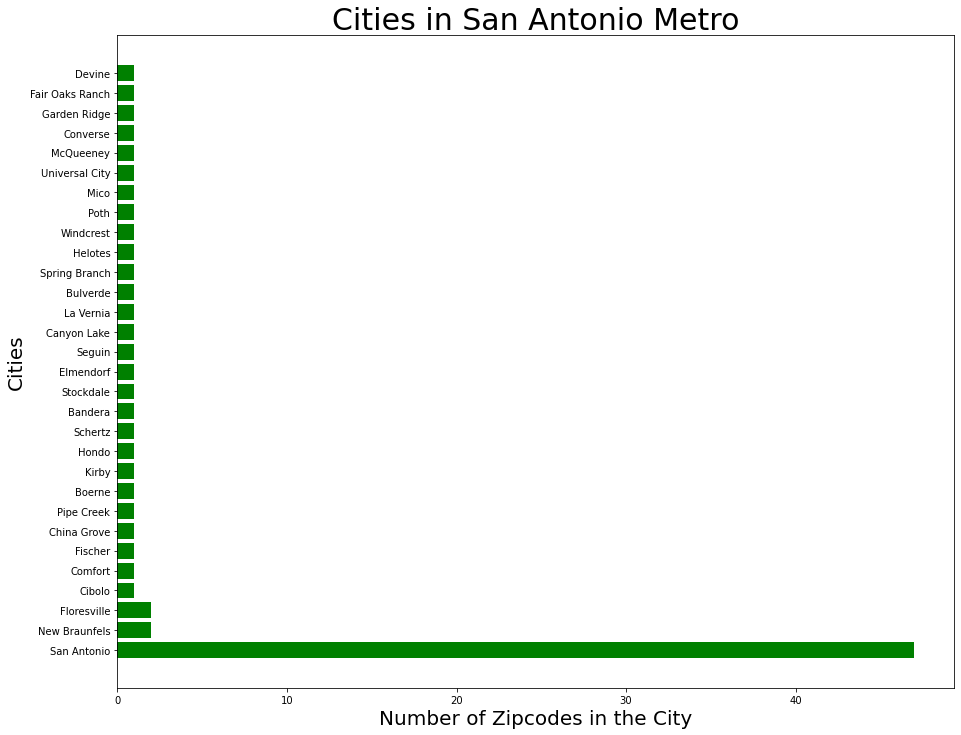

In [6]:
#Visualizing the value counts of zipcodes in each city in the San Antonio metro area


fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in sa_df['City'].value_counts()]

x = [a for a in sa_df['City'].value_counts().keys()]

ax.barh(x,y,color='green')
ax.set_title('Cities in San Antonio Metro',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of Zipcodes in the City',fontsize=20);

## Data Cleaning

In [7]:
# Create copy of df to calculate ROIs
roi_df = sa_df.copy()
roi_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000


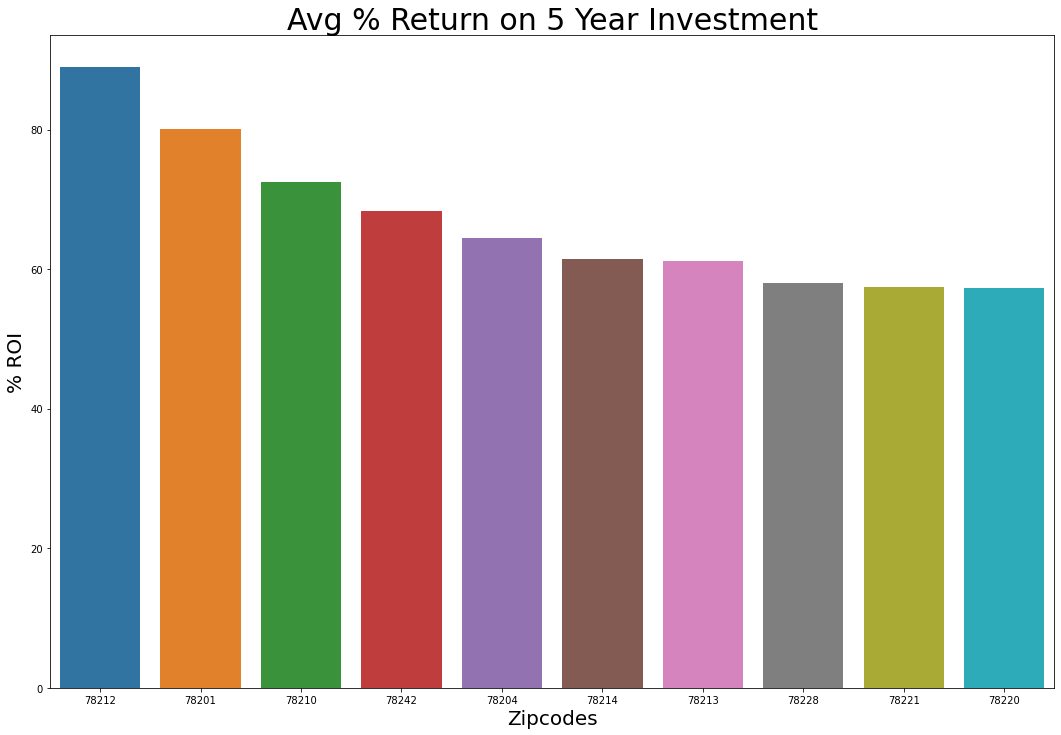

In [43]:
# Calculate 5 year ROI and keep top 10
roi_df['roi_5_year'] = ((roi_df['2018-04'] - roi_df['2013-04'])/(roi_df['2013-04'])*100)
sa_5_year_roi = roi_df.sort_values('roi_5_year',ascending=False).head(10)
sa_5_year_roi['RegionName'] = sa_5_year_roi['RegionName'].astype(str)

#Plot
fig,ax=plt.subplots(figsize=(18,12))
sns.barplot('RegionName', 'roi_5_year', data = sa_5_year_roi)

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 5 Year Investment',fontsize='30');

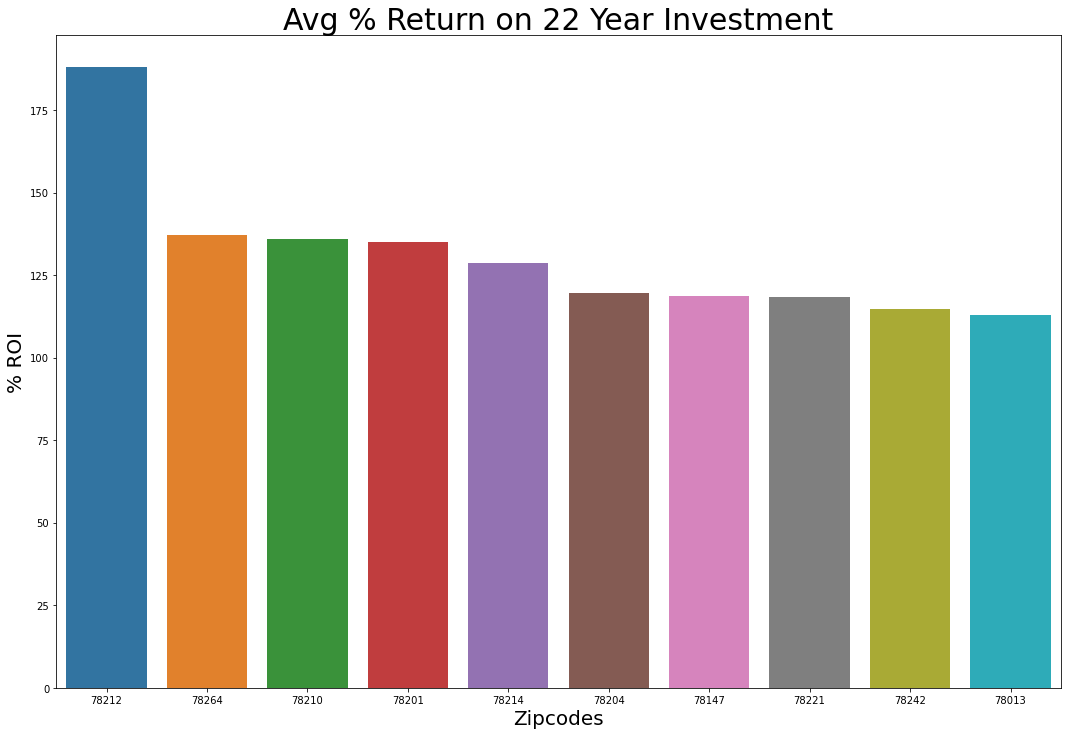

In [42]:
# Calculate 22 year ROI and keep top 10
roi_df['roi_22year'] = ((roi_df['2018-04'] - roi_df['1996-04'])/(roi_df['1996-04'])*100)
sa_22_year_roi = roi_df.sort_values('roi_22year',ascending=False).head(10)
sa_22_year_roi['RegionName'] = sa_22_year_roi['RegionName'].astype(str)

#Plot
fig,ax=plt.subplots(figsize=(18,12))
sns.barplot('RegionName', 'roi_22year', data = sa_22_year_roi)

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 22 Year Investment',fontsize='30');

In [10]:
sa_22_year_roi

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_5year,roi_22year
2944,92308,78212,San Antonio,TX,San Antonio,Bexar,2945,79500.0,79800.0,80100.0,...,204300,206300,211100,217200,222300,225800,228100,229100,89.026403,188.176101
8481,92360,78264,San Antonio,TX,San Antonio,Bexar,8482,60800.0,60700.0,60600.0,...,135500,138400,139300,139700,141300,143200,143900,144100,48.556701,137.006579
2362,92306,78210,San Antonio,TX,San Antonio,Bexar,2363,50600.0,50500.0,50500.0,...,105600,107800,108800,110000,111900,114500,117200,119400,72.543353,135.968379
1127,92297,78201,San Antonio,TX,San Antonio,Bexar,1128,59800.0,59900.0,60100.0,...,134700,135300,136200,137800,139100,139800,140300,140600,80.025608,135.117057
5455,92310,78214,San Antonio,TX,San Antonio,Bexar,5456,47000.0,47000.0,47000.0,...,99000,99100,99900,101900,103200,104600,106100,107500,61.411411,128.723404
7776,92300,78204,San Antonio,TX,San Antonio,Bexar,7777,47300.0,47300.0,47400.0,...,91500,94000,96600,97900,98200,99300,101600,103900,64.398734,119.661734
13442,92283,78147,Poth,TX,San Antonio,Wilson,13443,63800.0,63800.0,63900.0,...,138000,139300,140700,141400,140900,139900,139400,139500,43.518519,118.652038
3016,92317,78221,San Antonio,TX,San Antonio,Bexar,3017,53600.0,53600.0,53500.0,...,109700,110000,110600,111900,113800,115200,116200,117000,57.469717,118.283582
4609,92338,78242,San Antonio,TX,San Antonio,Bexar,4610,47700.0,47900.0,48100.0,...,89000,89600,90100,92000,94800,97400,100100,102500,68.308703,114.884696
10215,92203,78013,Comfort,TX,San Antonio,Kendall,10216,106600.0,106400.0,106300.0,...,193700,196700,202900,209400,212000,214700,221200,227100,33.196481,113.039400


### Reshape from Wide to Long Format

In [11]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], format = '%Y-%m')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
# Get average of San Antonio metro zipcodes
satx_df_melted = melt_data(sa_df)
satx_df_melted.head()

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205


In [13]:
# Get average of all US zipcodes
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


### San Antonio vs US Median Home Prices

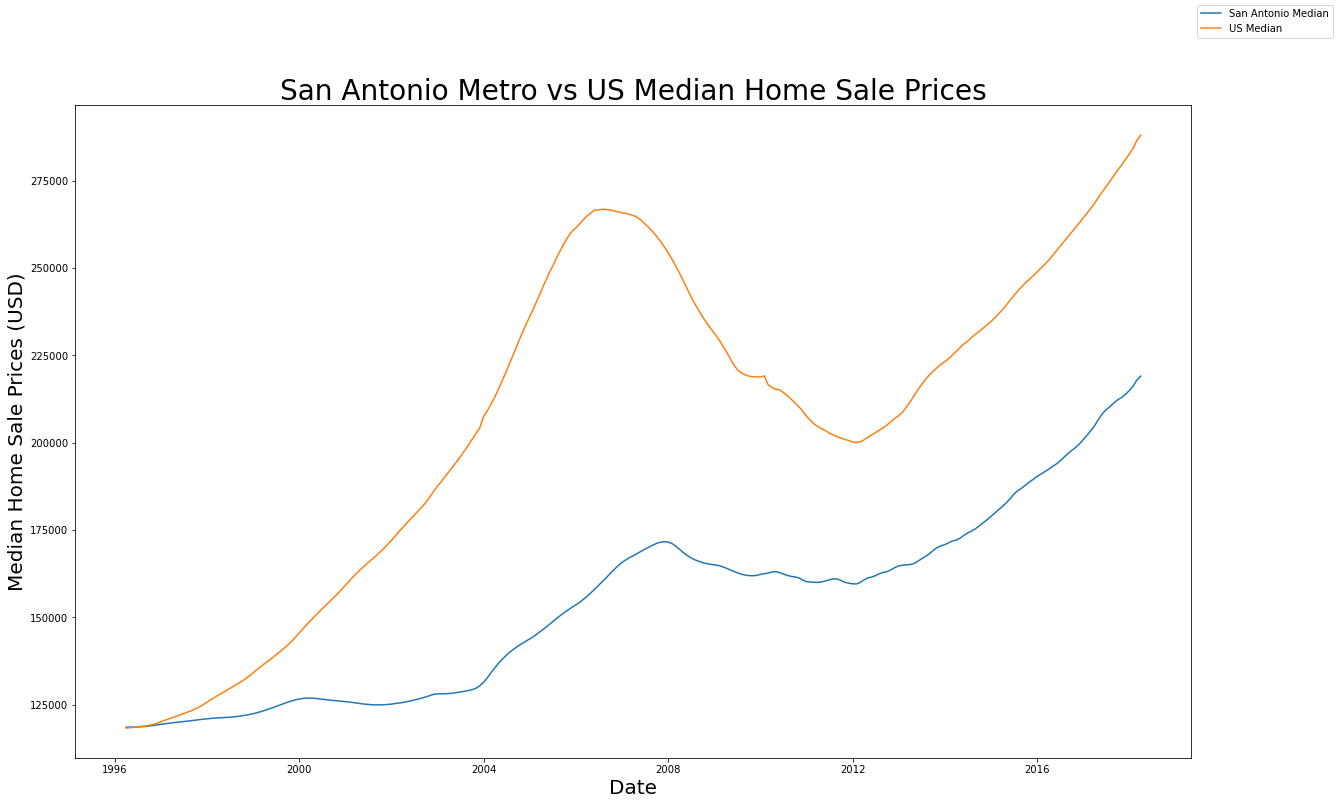

In [14]:
# Plot home value time series for all zip codes averaged

# Define figure
ax = plt.figure(figsize=(20,12))

# Plot
plt.plot(satx_df_melted, label = 'San Antonio Median')
plt.plot(df_melted, label = 'US Median')

# Title, x & y labels
plt.title('San Antonio Metro vs US Median Home Sale Prices', fontsize=28)
plt.ylabel('Median Home Sale Prices (USD)', fontsize=20)
plt.xlabel('Date', fontsize=20)
ax.legend()

plt.show()

In [15]:
#Create dataframe for new melted data
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [16]:
satx_df = melt_df(sa_df)
satx_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,time,value
0,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-04-01,123900.0
1,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-05-01,123900.0
2,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-06-01,123800.0
3,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-07-01,123800.0
4,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-08-01,123800.0


In [17]:
model_df = satx_df.drop(['RegionID','City','State','Metro','CountyName'], axis ='columns').set_index('time')
model_df.head()

,RegionName,value
time,,
1996-04-01,78130,123900.0
1996-05-01,78130,123900.0
1996-06-01,78130,123800.0
1996-07-01,78130,123800.0
1996-08-01,78130,123800.0


In [18]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20670 entries, 1996-04-01 to 2018-04-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  20670 non-null  int64  
 1   value       20670 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 484.5 KB


### Average Housing Prices In San Antonio Metro Over Time

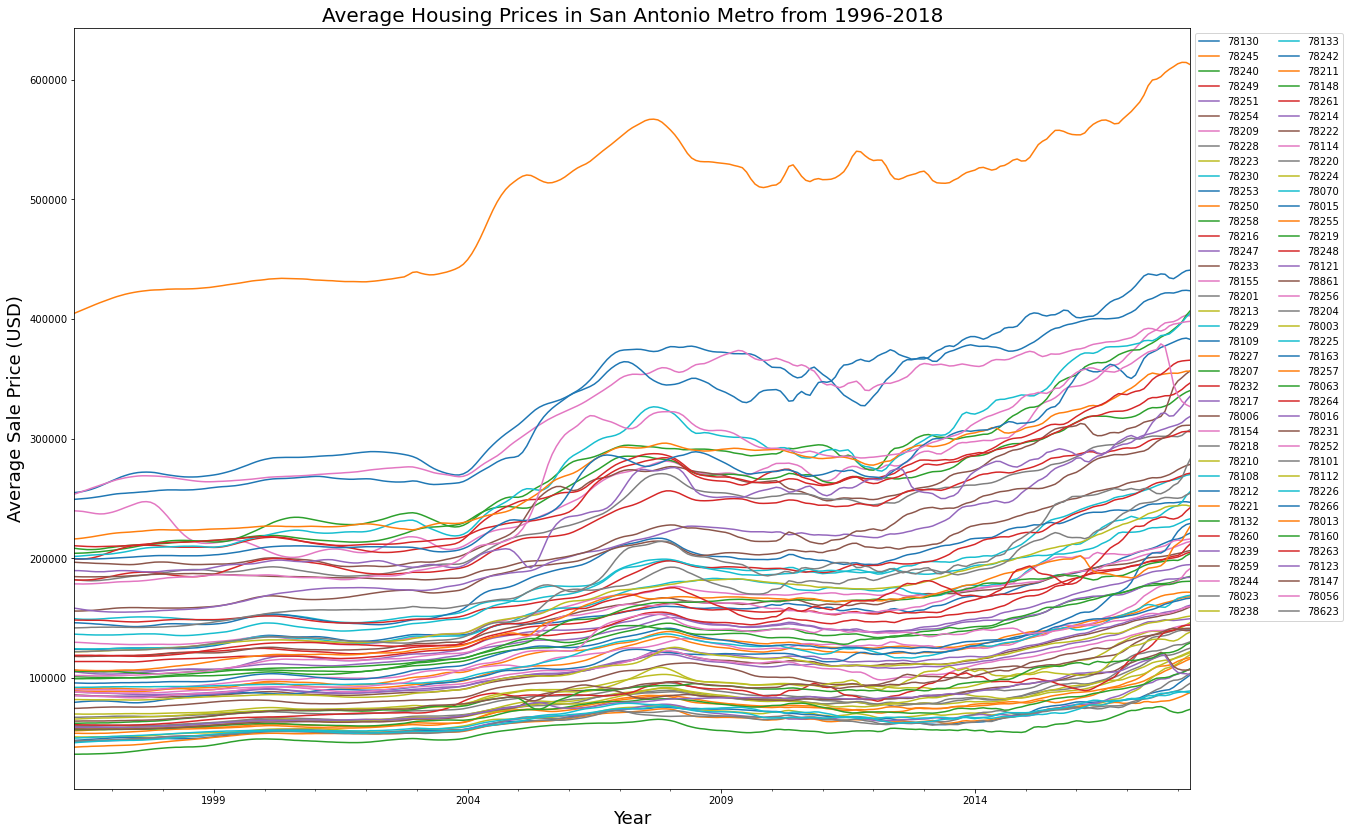

In [19]:
#plot the values grouped by zipcode
plt.figure(figsize=(20,14))
for zipcode in model_df.RegionName.unique():
    model_df.loc[model_df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=2)

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Average Sale Price (USD)", fontsize=18)
plt.title('Average Housing Prices in San Antonio Metro from 1996-2018', fontsize = 20)
plt.show();


In [20]:
model_df.loc[model_df['value'] >= 450000]

,RegionName,value
time,,
2004-02-01,78257,454600.0
2004-03-01,78257,460700.0
2004-04-01,78257,467700.0
2004-05-01,78257,475400.0
2004-06-01,78257,483400.0
...,...,...
2017-12-01,78257,611000.0
2018-01-01,78257,613400.0
2018-02-01,78257,614600.0


In [21]:
satx_df_melted

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205
...,...
2017-12-01,213852.564103
2018-01-01,214932.051282
2018-02-01,216239.743590


## ARIMA Modeling

### Seasonal Decomposition

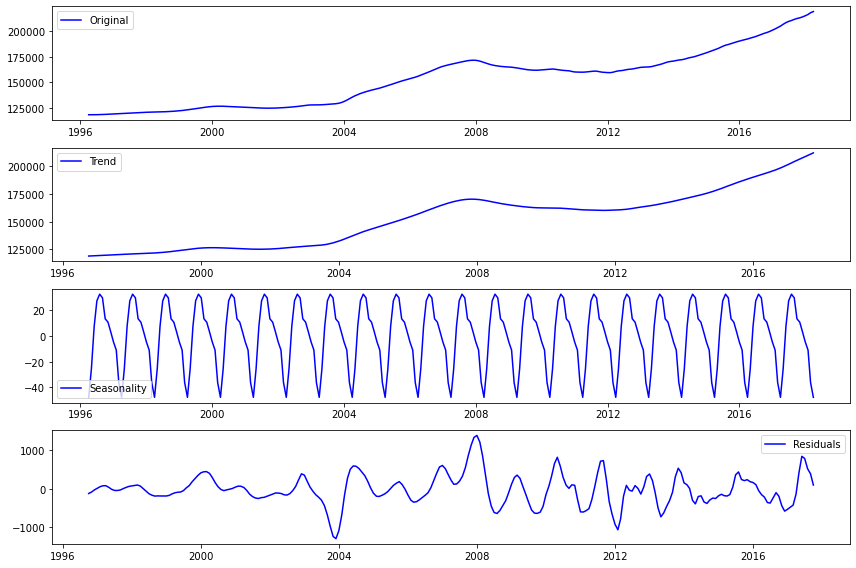

In [22]:
decomposition = sm.tsa.seasonal_decompose(satx_df_melted, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(satx_df_melted, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Stationarity Check

In [23]:
def stationarity_check(TS):
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

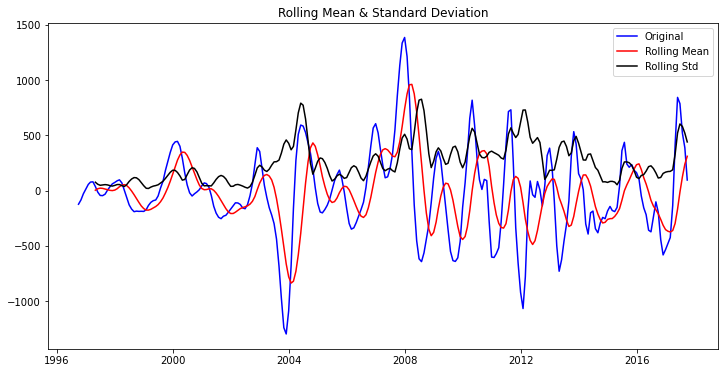

Results of Dickey-Fuller Test: 

Test Statistic                  -4.040103
p-value                          0.001214
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [25]:
stationarity_check(ts_log_decompose)

### Autocorrelation and Partial Autocorrelation

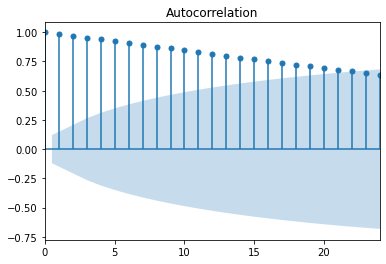

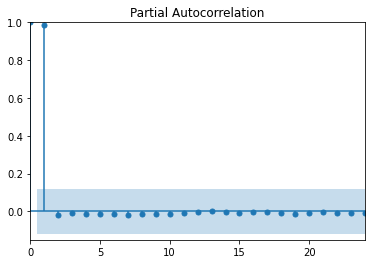

In [26]:
plot_acf(satx_df_melted); plt.xlim(0,24); plt.show()
plot_pacf(satx_df_melted); plt.xlim(0,24); plt.ylim(-0.15,1);plt.show()

<AxesSubplot:xlabel='time'>

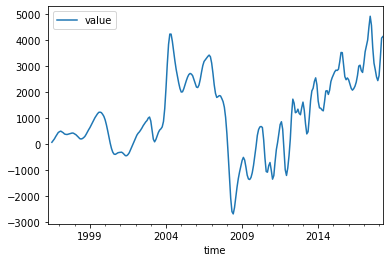

In [27]:
satx_df_melted.diff(periods=3).plot()

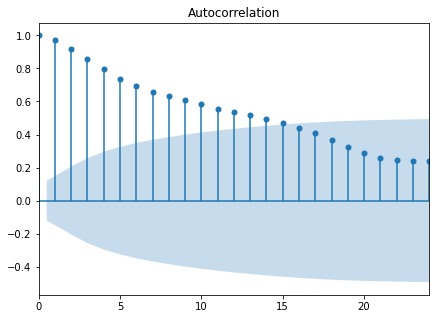

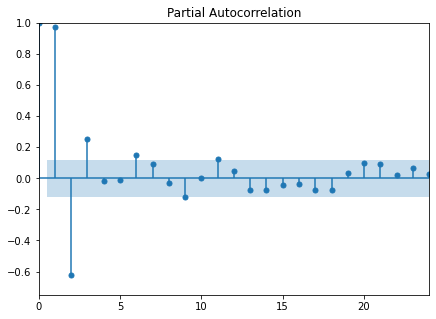

In [28]:
rcParams['figure.figsize']=7,5
plot_acf(satx_df_melted.diff(periods=3).bfill()); plt.xlim(0,24); plt.show()
plot_pacf(satx_df_melted.diff(periods=3).bfill()); plt.xlim(0,24); plt.ylim(-0.75,1);plt.show()

In [29]:
model_df

,RegionName,value
time,,
1996-04-01,78130,123900.0
1996-05-01,78130,123900.0
1996-06-01,78130,123800.0
1996-07-01,78130,123800.0
1996-08-01,78130,123800.0
...,...,...
2017-12-01,78623,260900.0
2018-01-01,78623,262700.0
2018-02-01,78623,267100.0


### Gridsearch for SARIMAX Model

In [30]:
# Define function to create individual time series by zipcode
def zipcode_ts(df, zipcode):
    '''
    Input:
        df : dataframe of Zillow housing data.
        zipcode : list of zip codes to iterate through.
    '''
    zipcode_df = df[df['RegionName'] == zipcode]
    zipcode_df = zipcode_df.drop(columns = 'RegionName', axis=1)
    return zipcode_df 

In [46]:
zip_df = []
zip_list = [78212, 78201, 78210, 78242, 78204, 78214, 78213, 78228, 78221, 78220]

for z in model_df['RegionName'].unique():
    if z in zip_list:
        training_data = zipcode_ts(model_df, z)
        zip_df.append(training_data)
    else:
        continue

In [47]:
zip_df

[               value
 time                
 1996-04-01   59400.0
 1996-05-01   59400.0
 1996-06-01   59400.0
 1996-07-01   59400.0
 1996-08-01   59500.0
 ...              ...
 2017-12-01  119600.0
 2018-01-01  120800.0
 2018-02-01  122200.0
 2018-03-01  123700.0
 2018-04-01  124800.0
 
 [265 rows x 1 columns],
                value
 time                
 1996-04-01   59800.0
 1996-05-01   59900.0
 1996-06-01   60100.0
 1996-07-01   60200.0
 1996-08-01   60300.0
 ...              ...
 2017-12-01  137800.0
 2018-01-01  139100.0
 2018-02-01  139800.0
 2018-03-01  140300.0
 2018-04-01  140600.0
 
 [265 rows x 1 columns],
                value
 time                
 1996-04-01   69700.0
 1996-05-01   69700.0
 1996-06-01   69600.0
 1996-07-01   69600.0
 1996-08-01   69600.0
 ...              ...
 2017-12-01  140200.0
 2018-01-01  141100.0
 2018-02-01  142200.0
 2018-03-01  144300.0
 2018-04-01  146200.0
 
 [265 rows x 1 columns],
                value
 time                
 1996-04-01   506

In [33]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [48]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for df, name in zip(zip_df, zip_list):
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([name, comb, combs, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(comb, combs, output.aic))
            except:
                continue


Result for 78212 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 6710.71231554358
Result for 78212 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6246.4260775583
Result for 78212 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 5074.881363012128
Result for 78212 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4838.876377282593
Result for 78212 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5010.754504215203
Result for 78212 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4991.188738956817
Result for 78212 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 4704.591080846378
Result for 78212 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4688.829264196271
Result for 78212 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 6495.344770867073
Result for 78212 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 6156.340972977515
Result for 78212 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4900.127220500699
Result for 78212 ARIMA (0, 0, 1) x 

Result for 78201 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3782.7954372717763
Result for 78201 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3726.802619848265
Result for 78201 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3620.925005291875
Result for 78201 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 4231.663336898397
Result for 78201 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4186.510705213483
Result for 78201 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 4165.118327265444
Result for 78201 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3923.0496073316085
Result for 78201 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 4048.4889412564057
Result for 78201 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 4169.901416411127
Result for 78201 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3851.4951545478357
Result for 78201 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4079.5692890362443
Result for 78201 ARIMA (1, 

Result for 78210 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3597.5781322669013
Result for 78210 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3278.2209987456963
Result for 78210 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3404.225378072697
Result for 78210 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3357.833256542047
Result for 78210 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3375.9873159751032
Result for 78210 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3337.696734962142
Result for 78242 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 6628.754610718948
Result for 78242 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6356.4671401631895
Result for 78242 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 5137.185683272371
Result for 78242 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 4901.047797746663
Result for 78242 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 5098.265179683827
Result for 78242 ARIMA (0, 0

Result for 78204 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 4015.64452259242
Result for 78204 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 4177.995893242875
Result for 78204 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3978.005186387158
Result for 78204 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 4122.272501510965
Result for 78204 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3775.884142965415
Result for 78204 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 4025.12495232496
Result for 78204 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3959.536621088105
Result for 78204 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3887.604148568832
Result for 78204 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3771.5995211004474
Result for 78204 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 4414.839808894402
Result for 78204 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4373.612559044701
Result for 78204 ARIMA (1, 0, 0) 

Result for 78214 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3437.3482816735514
Result for 78214 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3410.0043914852304
Result for 78214 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3566.2718711526036
Result for 78214 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3409.322973672508
Result for 78214 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3588.2505060729886
Result for 78214 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3291.0389170286007
Result for 78214 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3427.996212517978
Result for 78214 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3400.6499127123147
Result for 78214 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 3398.153155872229
Result for 78214 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 3362.4898582916667
Result for 78213 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 6608.597330305005
Result for 78213 ARIMA (0

Result for 78228 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3693.5063602747473
Result for 78228 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 3879.0131783976562
Result for 78228 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 3863.154038074312
Result for 78228 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3714.671841607733
Result for 78228 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3692.497687296597
Result for 78228 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3846.134392508727
Result for 78228 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3662.1847907682404
Result for 78228 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3741.7446038493513
Result for 78228 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3506.7794981713278
Result for 78228 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3709.453795987168
Result for 78228 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3658.8614605186012
Result for 78228 ARIMA (0,

Result for 78221 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 3408.469752202519
Result for 78221 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 3485.827112492695
Result for 78221 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 3479.185003355415
Result for 78221 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 3455.055899802014
Result for 78221 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 3409.1379339963164
Result for 78221 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 3603.138612300152
Result for 78221 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3439.452578490031
Result for 78221 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 3628.350269675945
Result for 78221 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 3319.677000333795
Result for 78221 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 3458.6194758732486
Result for 78221 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 3440.7287383034436
Result for 78221 ARIMA (1, 1,

In [49]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['name', 'pdq', 'pdqs', 'aic'])
ans_df

,name,pdq,pdqs,aic
0,78212,"(0, 0, 0)","(0, 0, 0, 12)",6710.712316
1,78212,"(0, 0, 0)","(0, 0, 1, 12)",6246.426078
2,78212,"(0, 0, 0)","(0, 1, 0, 12)",5074.881363
3,78212,"(0, 0, 0)","(0, 1, 1, 12)",4838.876377
4,78212,"(0, 0, 0)","(1, 0, 0, 12)",5010.754504
...,...,...,...,...
635,78220,"(1, 1, 1)","(0, 1, 1, 12)",3420.983374
636,78220,"(1, 1, 1)","(1, 0, 0, 12)",3558.628765
637,78220,"(1, 1, 1)","(1, 0, 1, 12)",3513.008953
638,78220,"(1, 1, 1)","(1, 1, 0, 12)",3546.192876


In [50]:
#Return the best set of parameters based on AIC
best_para = ans_df.loc[ans_df.groupby("name")["aic"].idxmin()]
best_para

,name,pdq,pdqs,aic
123,78201,"(1, 1, 1)","(0, 1, 1, 12)",3350.412566
315,78204,"(1, 1, 1)","(0, 1, 1, 12)",3591.289386
187,78210,"(1, 1, 1)","(0, 1, 1, 12)",3278.220999
59,78212,"(1, 1, 1)","(0, 1, 1, 12)",3256.572896
443,78213,"(1, 1, 1)","(0, 1, 1, 12)",3264.891918
379,78214,"(1, 1, 1)","(0, 1, 1, 12)",3291.038917
635,78220,"(1, 1, 1)","(0, 1, 1, 12)",3420.983374
575,78221,"(1, 1, 1)","(1, 1, 1, 12)",3319.530608
511,78228,"(1, 1, 1)","(1, 1, 1, 12)",3393.824386
255,78242,"(1, 1, 1)","(1, 1, 1, 12)",3346.301679


### Best Parameters SARIMAX Model

In [77]:
# Define function to build SARIMAX model, print summary and output diagnostic plots
def sarimax(ts, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)):
    '''
    Input: 
    ts : Time series data.
    order : (p, d, q) values for ARIMA. Default = (1, 1, 1)
    seasonal_order : Seasonal (P, D, Q, s) values for SARIMA.
        Default = (0, 1, 1, 12).
        
    Output:
    Prints model output summary.
    Plots model diagnostics.
    
    Returns: Model output.
    '''
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts, 
                                            order=order, 
                                            seasonal_order=seasonal_order, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
                                            
    # Fit the model and print results
    output = ARIMA_MODEL.fit()
    
    # Print output summary
    print(output.summary().tables[1])
    output.plot_diagnostics(figsize=(15,18));
    
    return output

In [112]:
def ose_forecast(ts, output, neighborhood =''):
    '''
    Plot forecast with real and predicted data.
    
    Input:
        ts : Time series.
        output : SARIMAX model output. 
        neighborhood : Name of city for plot title. 
        
    Output:
        Prints RMSE.
        Plots real vs. model predicted plot.
    '''

    # Get predictions starting from 01-31-1996 and calculate confidence intervals
    
    pred = output.get_prediction(start=pd.to_datetime('2018-01'), dynamic=False)
        
    # Get the real and predicted values
    ts_forecasted = pred.predicted_mean
    ts_truth = ts['2018-01':].value
    
    # Calc RMSE
    mse = mean_squared_error(ts_truth, ts_forecasted)
    rmse = np.sqrt(mse)

    # Print RMSE
    print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

    # Confidence Intervals
    pred_conf = pred.conf_int()

    ### Plot real vs predicted w/ confidence intervals ###

    rcParams['figure.figsize'] = 15, 6

    # Plot observed values
    ax = ts['2017-01':].plot(label='observed')

    # Plot predicted values
    
    ts_forecasted.plot(ax=ax, label='one-step ahead forecast', alpha=0.5)

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.3)
        
    # Title
    ax.set_title(neighborhood)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Median Home Value (USD)')
    plt.legend()

    return plt.show()

#### Olmos Park

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8376      0.030     27.739      0.000       0.778       0.897
ma.L1          0.4280      0.058      7.347      0.000       0.314       0.542
ma.S.L12      -0.9282      0.058    -15.901      0.000      -1.043      -0.814
sigma2      4.333e+04   3188.015     13.593      0.000    3.71e+04    4.96e+04


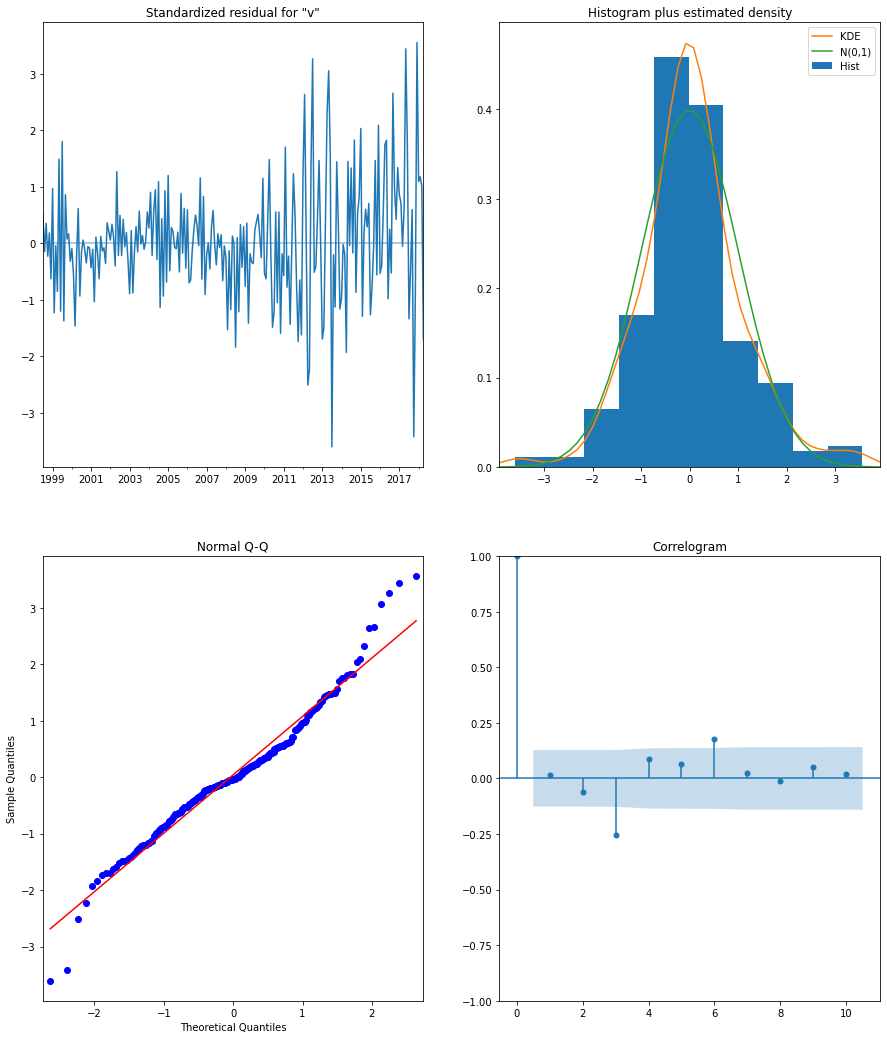

In [78]:
olmos_park = zip_df[0]
output_olmos_park = sarimax(olmos_park, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 266.56


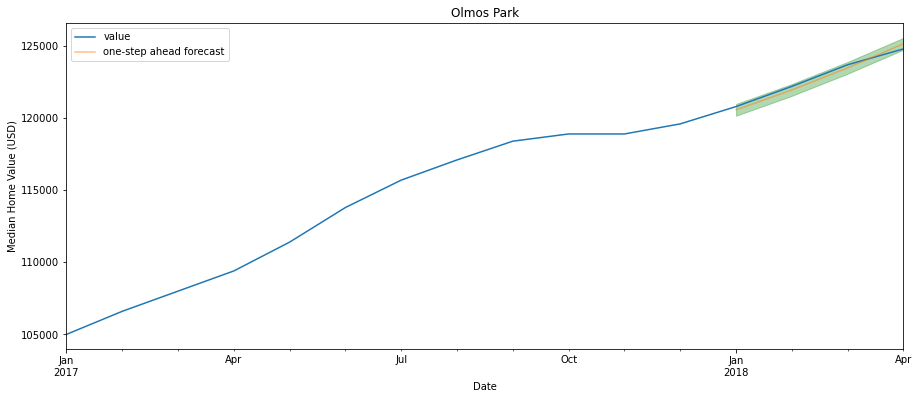

In [113]:
ose_forecast(olmos_park, output_olmos_park, neighborhood='Olmos Park')

#### Deco District

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8875      0.013     66.316      0.000       0.861       0.914
ma.L1          0.4954      0.041     12.008      0.000       0.415       0.576
ma.S.L12      -0.9801      0.220     -4.460      0.000      -1.411      -0.549
sigma2      6.001e+04   1.24e+04      4.854      0.000    3.58e+04    8.42e+04


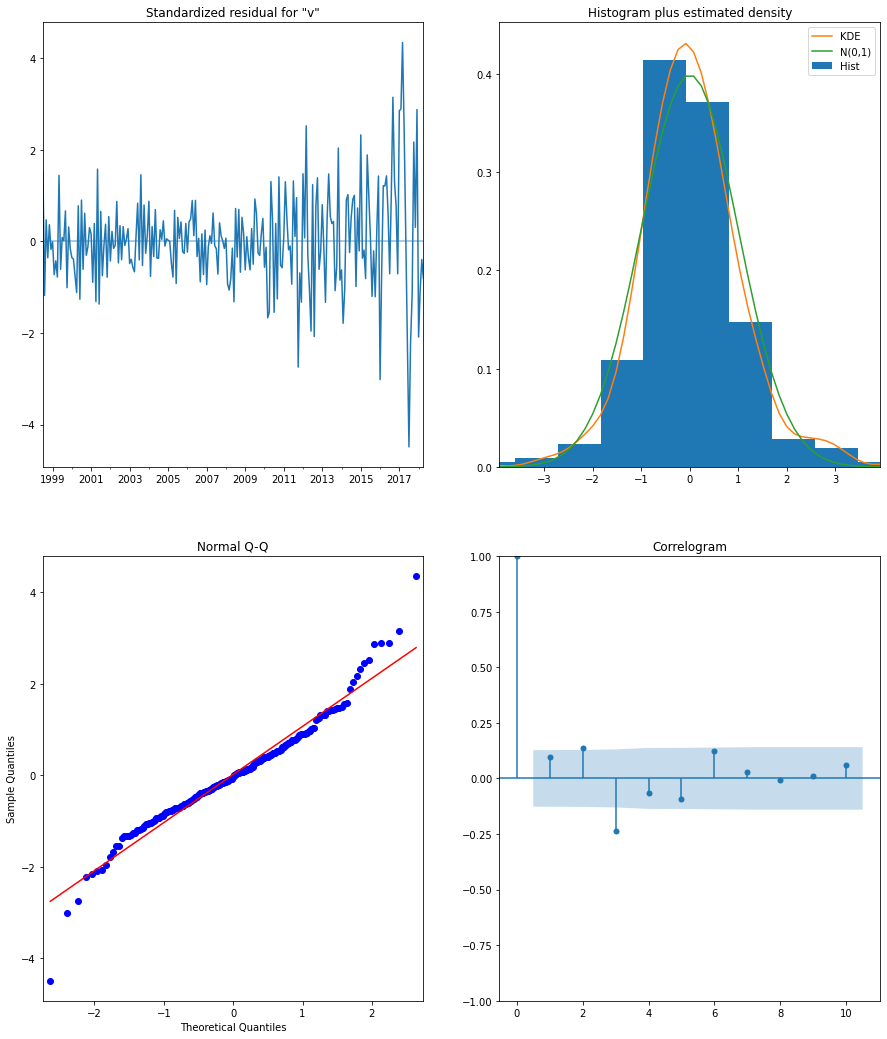

In [79]:
deco_district = zip_df[1]
output_deco_district = sarimax(deco_district, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 310.93


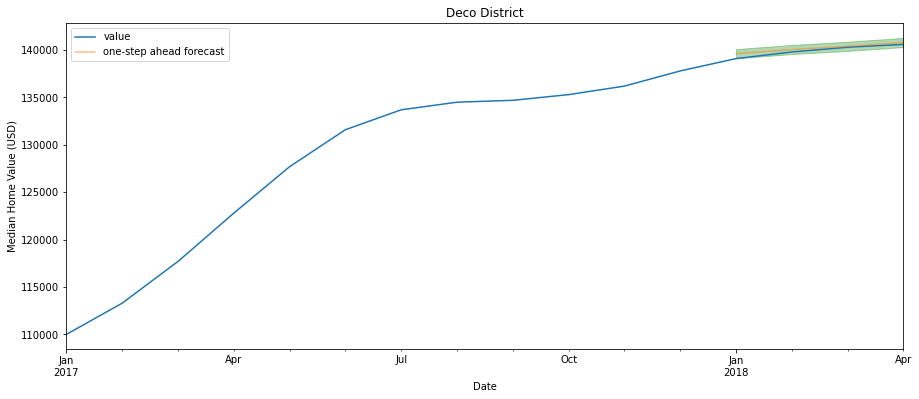

In [114]:
ose_forecast(deco_district, output_deco_district, neighborhood='Deco District')

#### Riverwalk / Downtown

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8495      0.025     33.324      0.000       0.800       0.899
ma.L1          0.5434      0.037     14.706      0.000       0.471       0.616
ma.S.L12      -0.9990      3.303     -0.302      0.762      -7.472       5.474
sigma2      4.338e+04   1.44e+05      0.302      0.763   -2.38e+05    3.25e+05


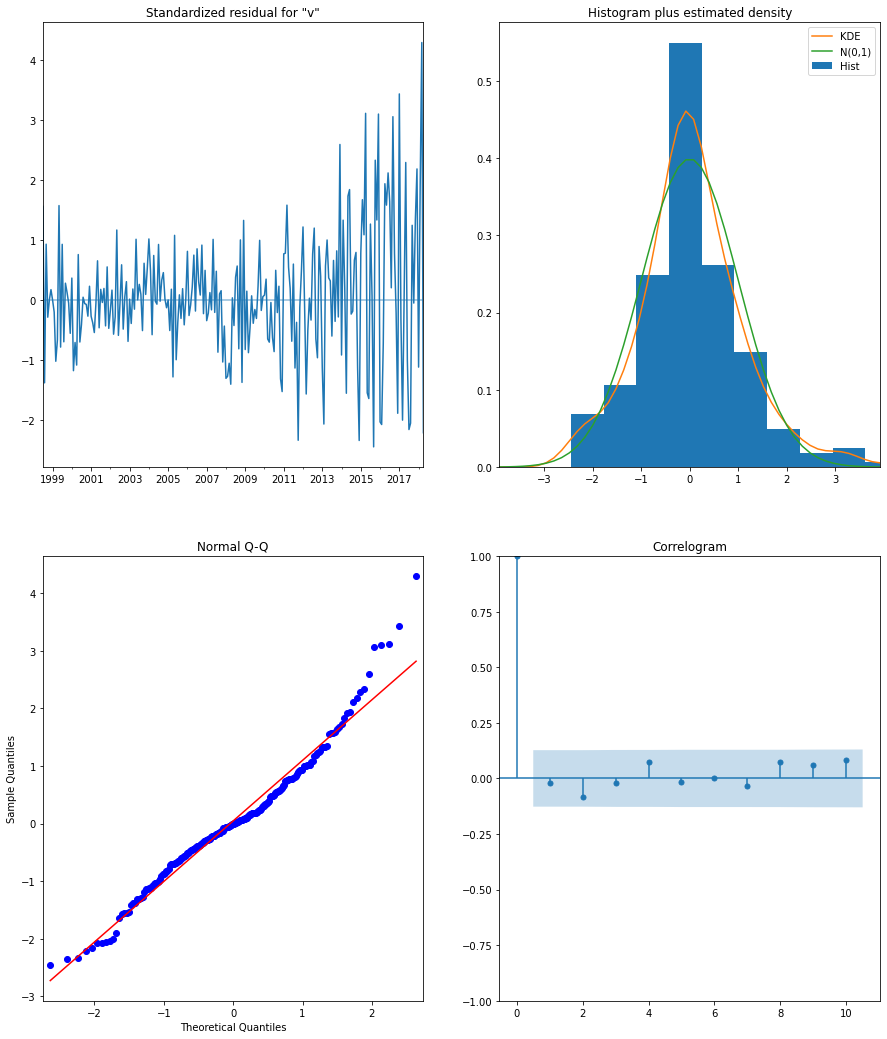

In [80]:
riverwalk = zip_df[2]
output_riverwalk = sarimax(riverwalk, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 566.36


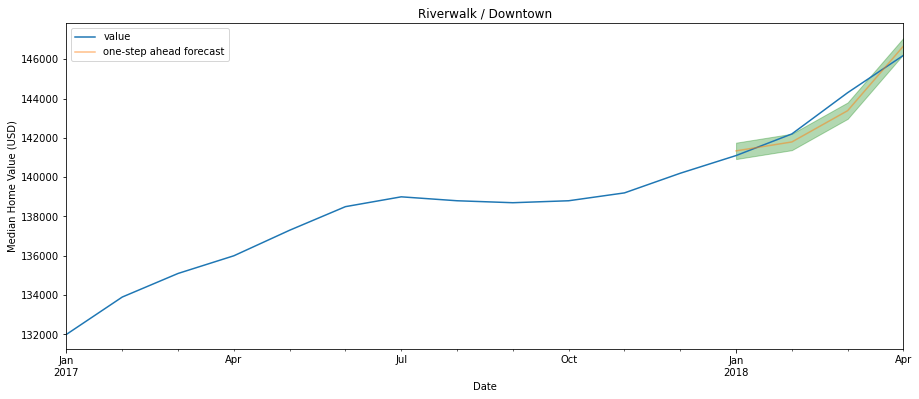

In [115]:
ose_forecast(riverwalk, output_riverwalk, neighborhood='Riverwalk / Downtown')

#### Westside / Lackland AFB

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8302      0.029     28.233      0.000       0.773       0.888
ma.L1          0.5860      0.051     11.412      0.000       0.485       0.687
ar.S.L12       0.0282      0.025      1.148      0.251      -0.020       0.076
ma.S.L12      -0.9975      1.889     -0.528      0.597      -4.699       2.704
sigma2      6.276e+04   1.16e+05      0.540      0.589   -1.65e+05    2.91e+05


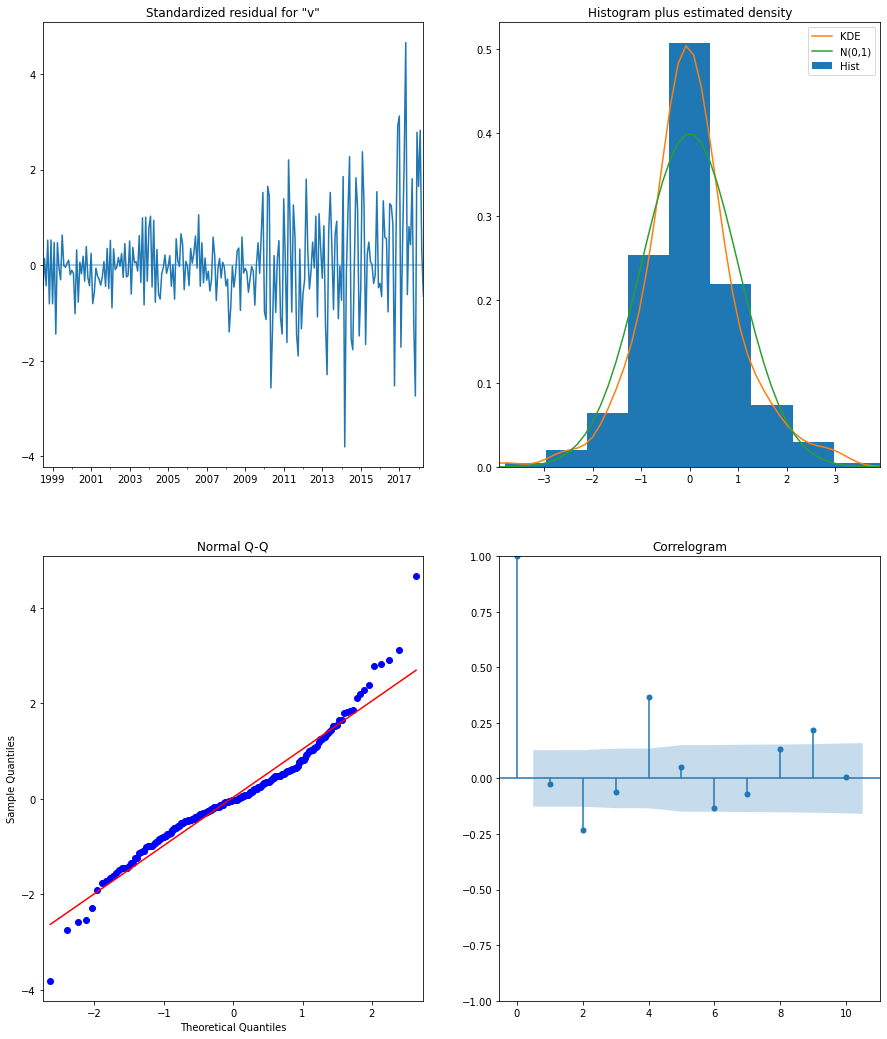

In [82]:
westside = zip_df[3]
output_westside = sarimax(westside, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

The RMSE of our forecasts is 427.86


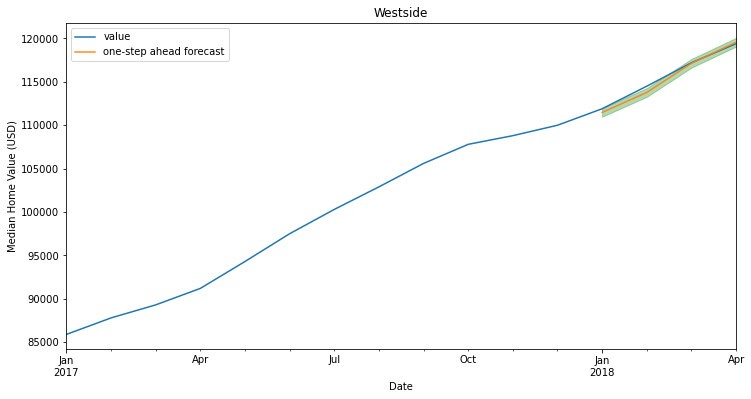

In [97]:
ose_forecast(westside, output_westside, neighborhood='Westside')

#### Southtown

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8407      0.020     42.099      0.000       0.802       0.880
ma.L1          0.6893      0.025     27.363      0.000       0.640       0.739
ma.S.L12      -0.9184      0.064    -14.361      0.000      -1.044      -0.793
sigma2      1.397e+05   9690.475     14.416      0.000    1.21e+05    1.59e+05


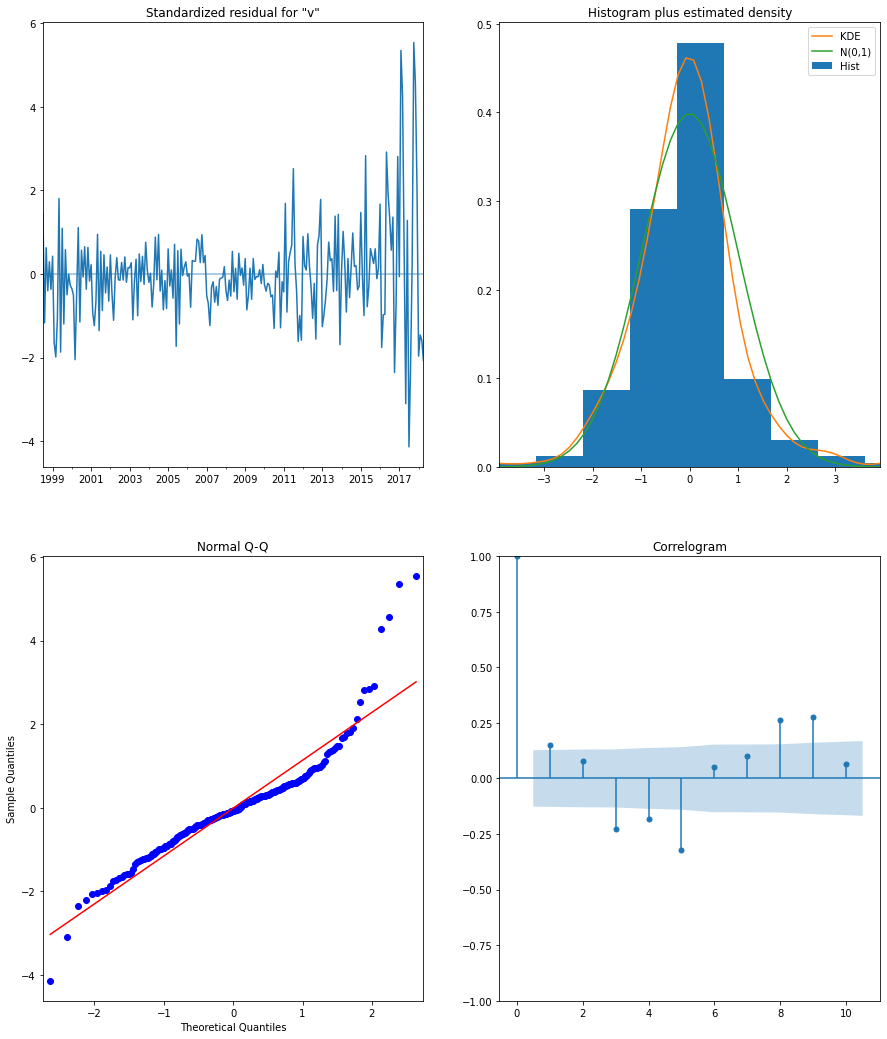

In [83]:
southtown = zip_df[4]
output_southtown = sarimax(southtown, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 669.75


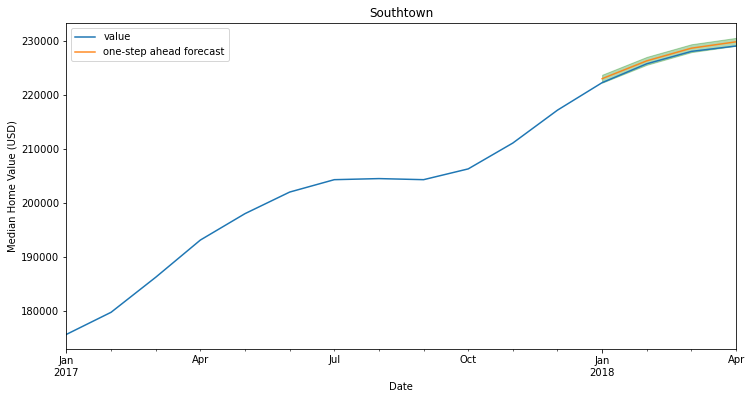

In [98]:
ose_forecast(southtown, output_southtown, neighborhood='Southtown')

#### Missions

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8305      0.031     27.042      0.000       0.770       0.891
ma.L1          0.4976      0.053      9.474      0.000       0.395       0.601
ma.S.L12      -0.9993      4.659     -0.215      0.830     -10.130       8.132
sigma2      4.821e+04   2.24e+05      0.215      0.830   -3.91e+05    4.88e+05


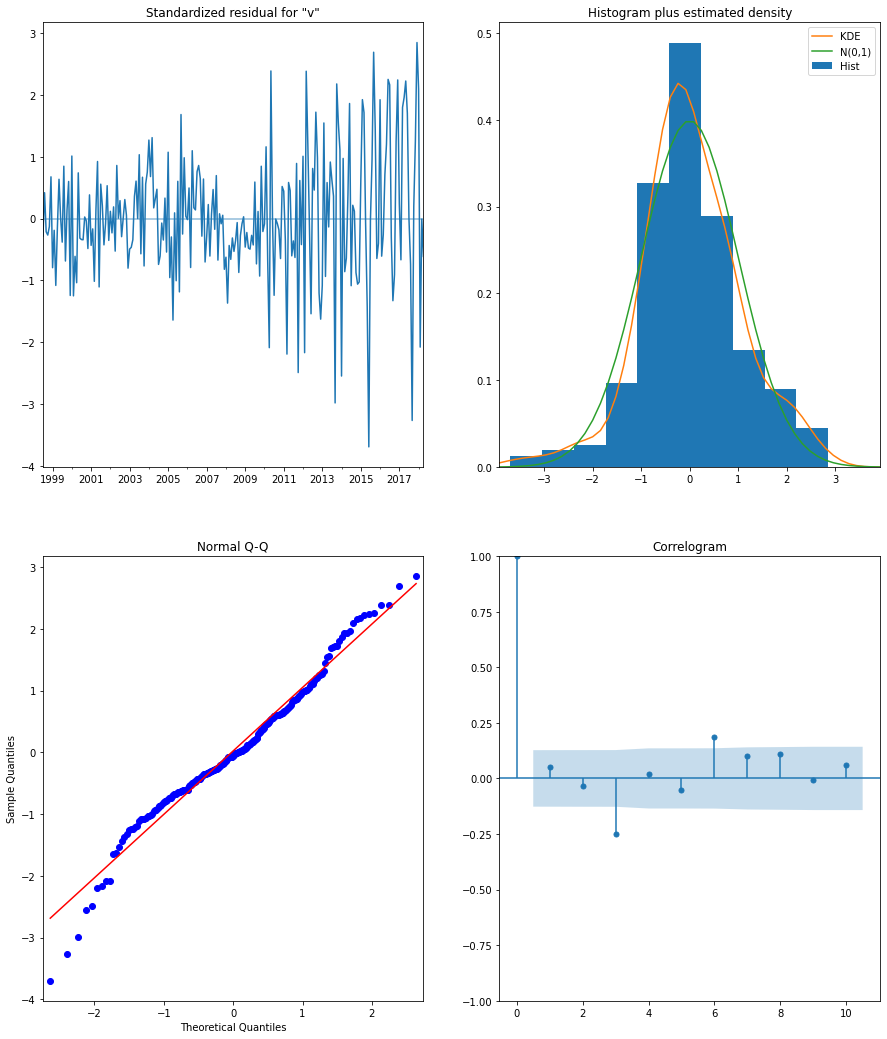

In [84]:
missions = zip_df[5]
output_missions = sarimax(missions, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 339.08


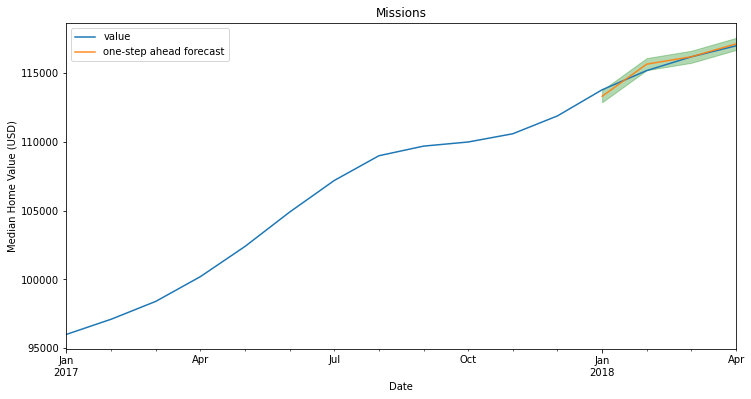

In [99]:
ose_forecast(missions, output_missions, neighborhood='Missions')

#### Castle Hills

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8583      0.038     22.641      0.000       0.784       0.933
ma.L1          0.4264      0.051      8.425      0.000       0.327       0.526
ma.S.L12      -1.0472      0.103    -10.202      0.000      -1.248      -0.846
sigma2      4.125e+04   4725.060      8.730      0.000     3.2e+04    5.05e+04


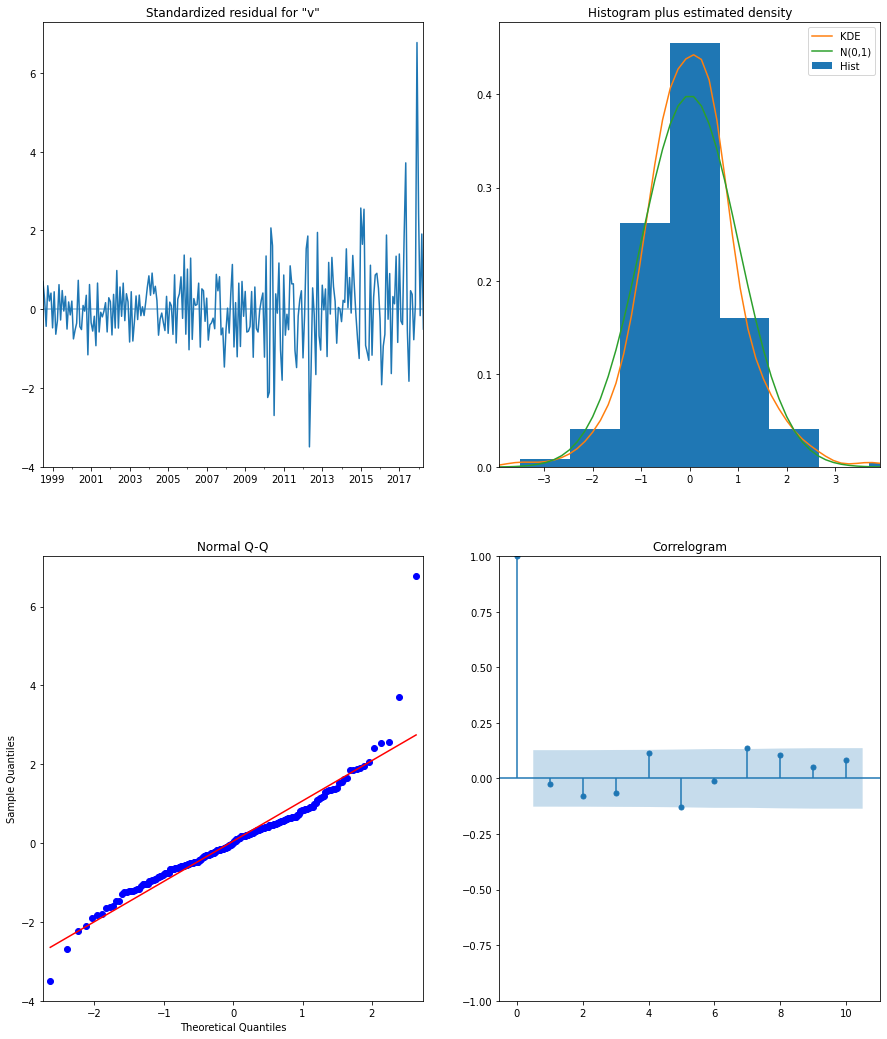

In [86]:
castle_hills = zip_df[6]
output_castle_hills = sarimax(castle_hills, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 335.3


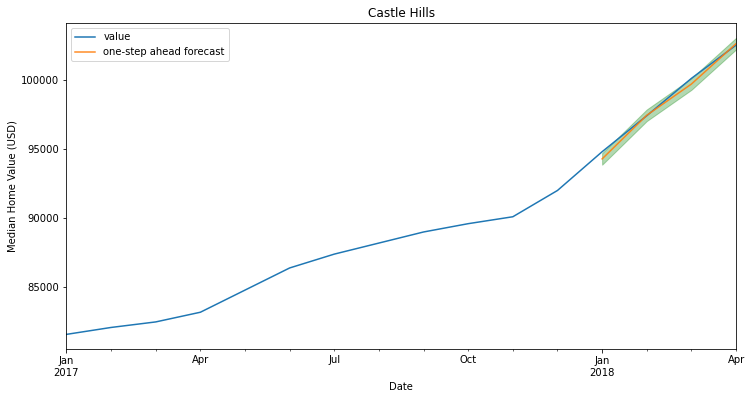

In [100]:
ose_forecast(castle_hills, output_castle_hills, neighborhood='Castle Hills')

#### Woodlawn Heights

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7585      0.040     19.043      0.000       0.680       0.837
ma.L1          0.3354      0.055      6.120      0.000       0.228       0.443
ar.S.L12       0.0457      0.038      1.203      0.229      -0.029       0.120
ma.S.L12      -0.9995      6.123     -0.163      0.870     -12.999      11.001
sigma2       7.69e+04    4.7e+05      0.163      0.870   -8.45e+05    9.99e+05


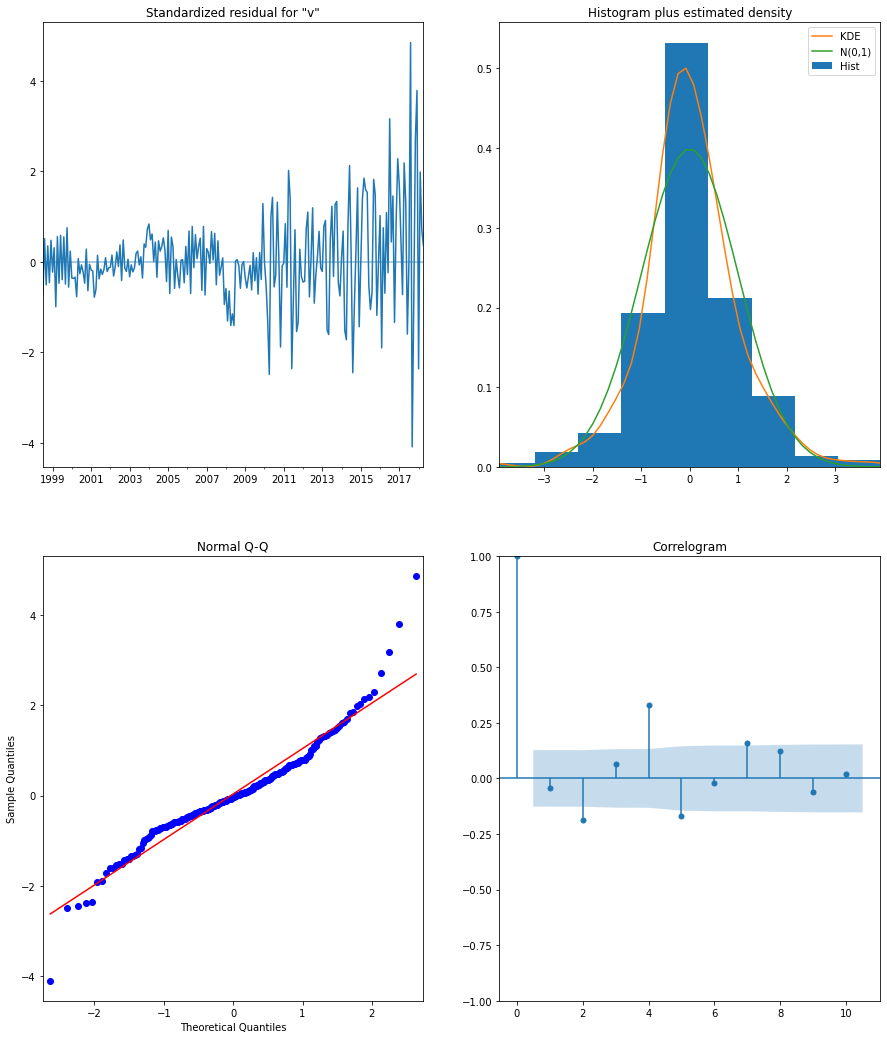

In [87]:
woodlawn_heights = zip_df[7]
output_woodlawn_heights = sarimax(woodlawn_heights, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

The RMSE of our forecasts is 452.6


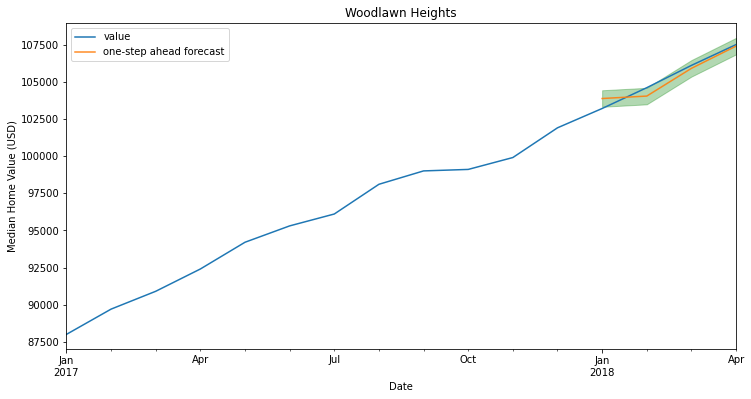

In [101]:
ose_forecast(woodlawn_heights, output_woodlawn_heights, neighborhood='Woodlawn Heights')

#### Southside

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7532      0.042     18.032      0.000       0.671       0.835
ma.L1          0.5000      0.050      9.953      0.000       0.402       0.598
ar.S.L12       0.0211      0.023      0.936      0.349      -0.023       0.065
ma.S.L12      -0.9995      5.892     -0.170      0.865     -12.547      10.548
sigma2        5.6e+04    3.3e+05      0.170      0.865    -5.9e+05    7.02e+05


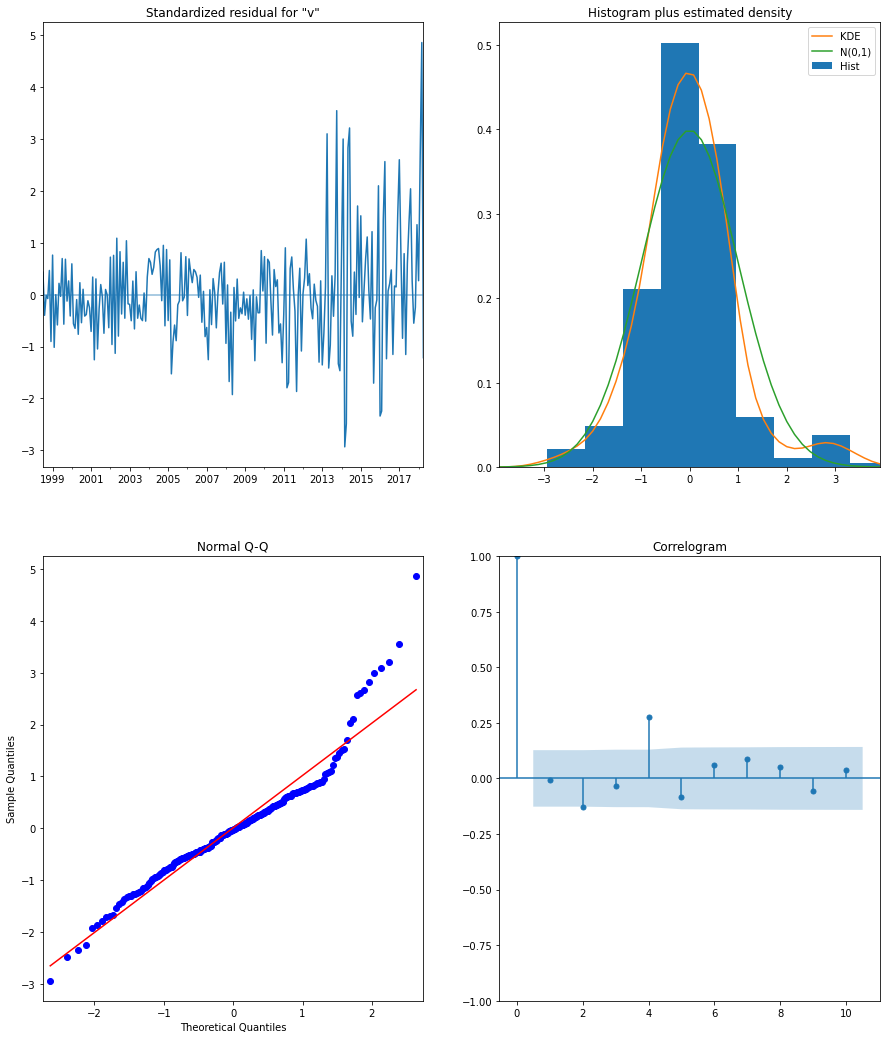

In [88]:
southside = zip_df[8]
output_southside = sarimax(southside, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

The RMSE of our forecasts is 687.69


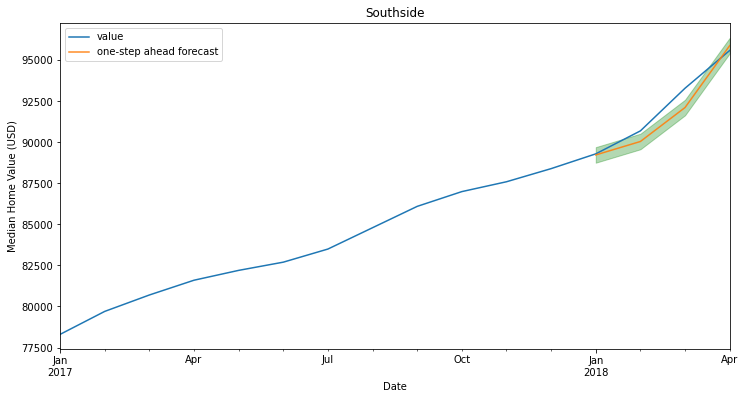

In [102]:
ose_forecast(southside, output_southside, neighborhood='Southside')

#### Eastside

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7314      0.039     18.600      0.000       0.654       0.808
ma.L1          0.5655      0.040     14.099      0.000       0.487       0.644
ma.S.L12      -0.9987      2.351     -0.425      0.671      -5.607       3.609
sigma2      8.088e+04   1.91e+05      0.424      0.672   -2.93e+05    4.55e+05


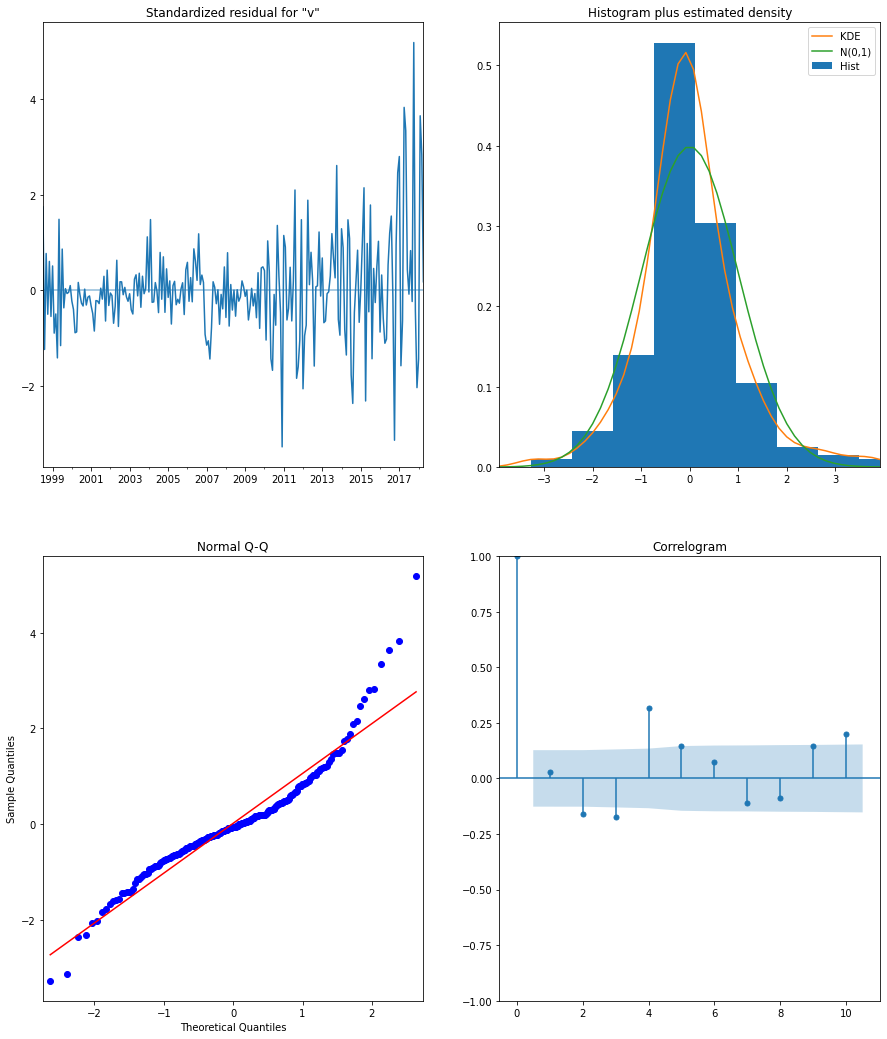

In [89]:
eastside = zip_df[9]
output_eastside = sarimax(eastside, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

The RMSE of our forecasts is 704.0


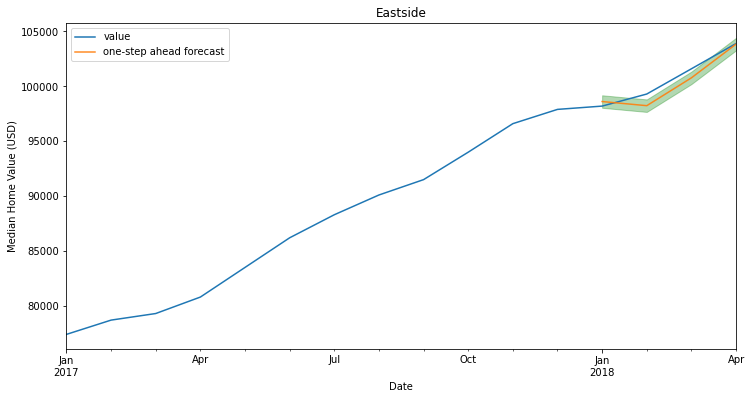

In [105]:
ose_forecast(eastside, output_eastside, neighborhood='Eastside')

## Step 6: Interpreting Results

# Step 6: Interpreting Results